<h1><center>

</center></h1>
<font size="6"><center>
EIE 401
PROCESAMIENTO DIGITAL MULTIMEDIA 
</center></font>


<center><h2>Actividad 2</h2></center>
<center><h3>Fundamentos: Análisis espectral</h3></center>
<center><h3>Profesor: Jorge Cardenas</h3></center>

<center><h3>Por: _______</h3></center>
<center><h5>Pontificia Universidad Catolica de Valparaiso</h5></center>
 

## 1. Carga archivos y carga datos en python
<p align="justify">
Una de las tareas más importantes es la de cargar archivos que incluyan datos para el procesamiento.

<p align="justify">
Debes cargar los dos archivos en formato txt y CSV, adquirir los datos y presentarlos en graficos usando la librería Matplotlib
    
    


<p align="justify">
Se descomprime el archivo txt que esta en formato .gz.

In [1]:
import gzip

with gzip.open('H-H1_GWOSC_16KHZ_R1-1268431079-32.txt.gz', 'rb') as f_in:
    data = f_in.read()

with open('txtActividad', 'wb') as f_out:
    f_out.write(data)


<p align="justify">
Se expresan los graficos de los 2 archivos usando la libreria Matplotlib

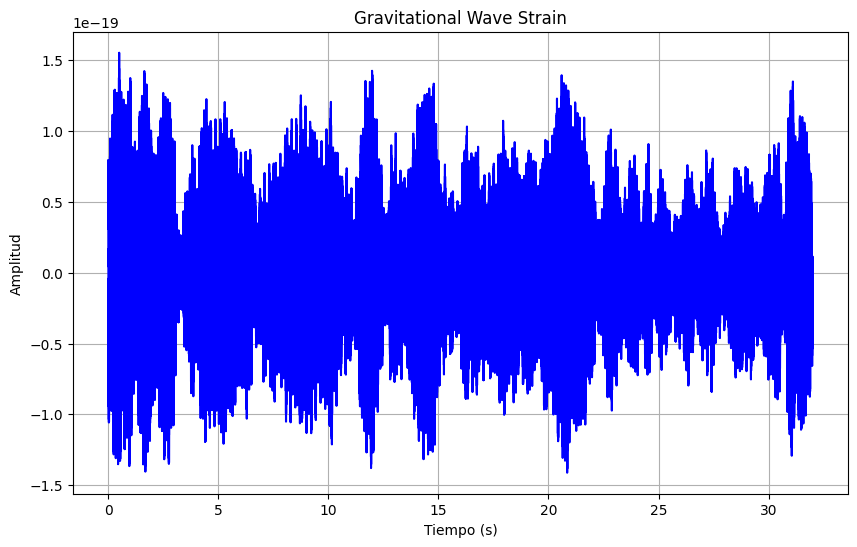

In [8]:
import matplotlib.pyplot as plt

# Nombre del archivo
file_name = 'Actividad.txt'  # Actualiza con el nombre de tu archivo

# Lectura de los datos del archivo
data = []
with open(file_name, 'r') as file:
    for line in file:
        # Ignorar líneas de comentarios y vacías
        if not line.startswith('#') and line.strip():
            data.append(float(line))

# Crear una lista de tiempo basada en el número de muestras por segundo
sample_rate = 16384  # Muestras por segundo
duration = 32  # Duración en segundos
time = [(1/sample_rate) * i for i in range(len(data))]

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(time, data, color='blue')
plt.title('Gravitational Wave Strain')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()



Ahora se procede a graficar el archivo CSV.

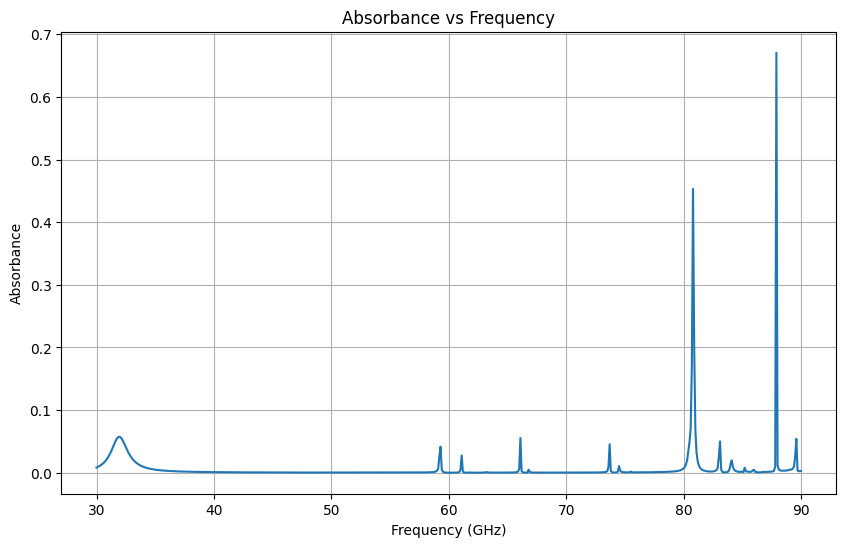

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo CSV
data = pd.read_csv("AbsorbanceTE_0-0.csv")

# Adquirir los datos
freq = data["Freq [GHz]"]
absorbance = data["AbsorbanceTE []"]

# Presentar los datos en gráficos usando Matplotlib
plt.figure(figsize=(10, 6))
plt.plot(freq, absorbance)
plt.title('Absorbance vs Frequency')
plt.xlabel('Frequency (GHz)')
plt.ylabel('Absorbance')
plt.grid(True)
plt.show()

## 2. Señal
<p align="justify">
Crea una señal continua (la suma de dos senoidales/cosenoidales, exponenciales) que utilizaras para las demostraciones siguientes. Presenta la función que usaste en una gráfica de tal forma que la ecuación esté incluida en dicha gráfica.

Incluye la ecuación en una celda de tu notebook usando LATEX.


$$
f(x) = \sin(2\pi x) + 0.5\cos(5\pi x) + \sin(7\pi x) + 0.3\cos(12\pi x)
$$

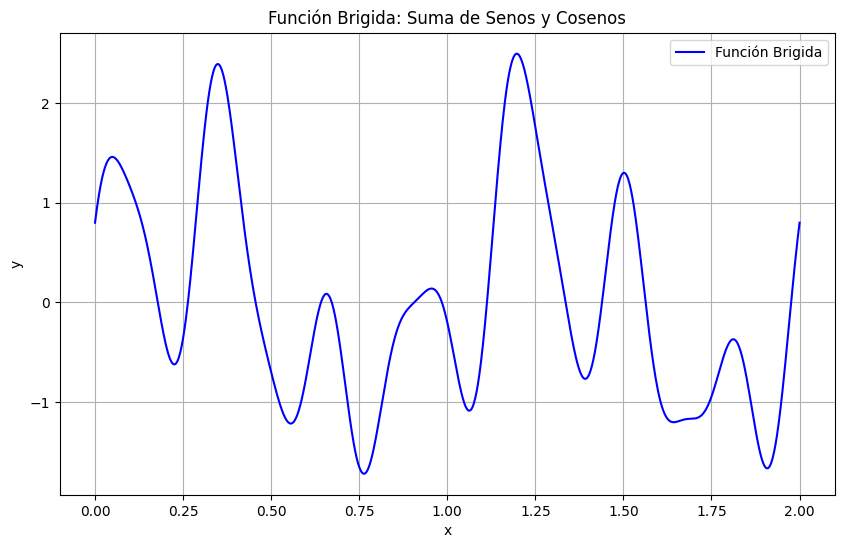

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Definición de la función
def funcion_brigida(x):
    return np.sin(2*np.pi*x) + 0.5*np.cos(5*np.pi*x) + np.sin(7*np.pi*x) + 0.3*np.cos(12*np.pi*x)

# Creación de puntos x
x = np.linspace(0, 2, 1000)

# Evaluación de la función en los puntos x
y = funcion_brigida(x)

# Gráfico de la función
plt.figure(figsize=(10,6))
plt.plot(x, y, color='blue', label='Función Brigida')
plt.title('Función Brigida: Suma de Senos y Cosenos')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


## 3. Sampleo
<p align="justify">
En este punto debes comprobar como se da la operación de sampleo y que sucede ante cambios en el intervalo de sampleo.    


### 3.1 Crea una señal impulso (delta) y desplazala
Para esto puedes usar alguna librería de python

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider

def impulse_signal(shift):
    x = np.arange(-5, 6)  # Reducimos el rango de la señal
    delta = np.zeros_like(x)
    delta[len(x)//2 + shift] = 1  # Generamos el impulso desplazado
    plt.stem(x, delta, use_line_collection=True)  # Usamos stem plot para visualizar el impulso
    plt.title('Señal Impulso Desplazada')
    plt.xlabel('Tiempo')
    plt.ylabel('Amplitud')
    plt.grid(True)
    plt.show()

# Creamos un control deslizante interactivo para cambiar el desplazamiento
interact(impulse_signal, shift=IntSlider(min=-5, max=5, step=1, value=0))



### 3.2 Genere una señal Senoidal y realice la operación de sampleo
Puedes utilizar el método "stem" de matplotlib para plotear el resultado.

### 3.3 Genere una señal Triangular y realice la operación de sampleo

### 3.4 Realice la operación de sampleo sobre la señal que generaste en el punto 2

### 3.5 Compruebe el teorema de Nyquist
Para comprobarlo, debes evaluar algunos casos:
1. la frecuencia de sampleo _f_ es mayor que la frecuencia máxima de tu señal, Fmax.
2. la frecuencia de sampleo _f_ es mayor que 2*Fmax.
3. la frecuencia de sampleo _f_ es mayor que 5*Fmax. 

<p align="justify">
Debe graficar:

1. la señal original.
2. la señal sampleada.
3. la señal reconstruida a partir del sampleo.

### 3.6 Explica tus hallazgos

## 4. Referencias
<p align="justify">
    

[Sobre Teorema del sampleo]https://ipython-books.github.io/chapter-10-signal-processing/

[Sobre Matplotlib] https://matplotlib.org/stable/gallery/mplot3d/2dcollections3d.html#sphx-glr-gallery-mplot3d-2dcollections3d-py